In [1]:
import os
import csv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

/home/sup/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sup/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sup/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sup/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

In [4]:
def preprocess_labels(filename):
    file = open(filename)
    labels = file.readlines()[1:]
    encoded_labels = []
    for label in labels:
        if label.split()[0] == 'Viral':
            encoded_labels.append(1)
        elif label.split()[0] == 'Normal':
            encoded_labels.append(0)
        else:
            encoded_labels.append(2)
    encoded_labels = np.array(encoded_labels)[..., np.newaxis]
    return encoded_labels

directory = '/home/sup/covid-19-dataset/'
train_images = np.load(os.path.join(directory, 'trainimage.npy'))
test_images = np.load(os.path.join(directory, 'testimage.npy'))

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# 0 - Normal, 1 - Viral Pnemonia, 2 - Covid
class_names = ['Normal', 'Viral Pnemonia', 'Covid']
train_labels = preprocess_labels(os.path.join(directory, 'trainLabels.csv'))
test_labels = preprocess_labels(os.path.join(directory, 'testLabels.csv'))

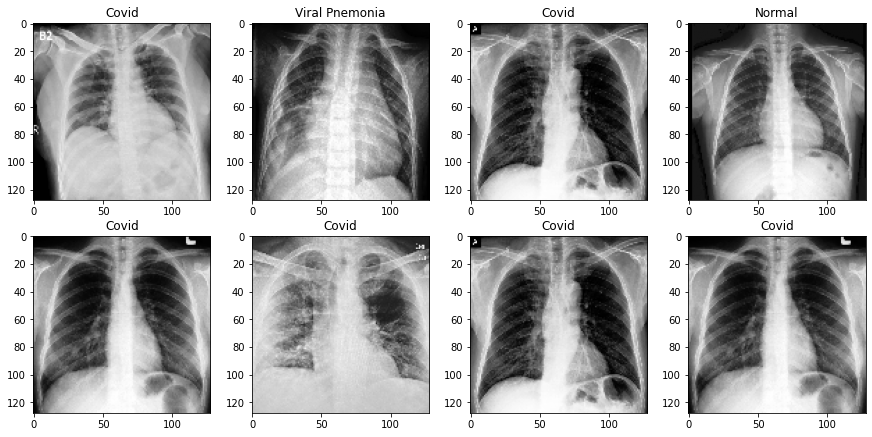

In [5]:
# Display images and labels
fig = plt.figure(figsize=(15, 15))
for i in range(8):
    fig.add_subplot(4, 4, i+1)
    image_id = np.random.randint(0, 251)
    plt.title(class_names[train_labels[image_id][0]])
    plt.imshow(train_images[image_id])
plt.show()

In [6]:
model = models.Sequential()
#conv2d: number of filters, filter_size, activation, input_shape
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
____

In [7]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Train on 251 samples, validate on 66 samples
Epoch 1/10
251/251 [==============================] - 0s 1ms/sample - loss: 1.5109 - acc: 0.8406 - val_loss: 2.7909 - val_acc: 0.8030
Epoch 2/10
251/251 [==============================] - 0s 1ms/sample - loss: 0.4317 - acc: 0.9363 - val_loss: 3.5456 - val_acc: 0.7424
Epoch 3/10
251/251 [==============================] - 0s 1ms/sample - loss: 0.2665 - acc: 0.9482 - val_loss: 2.3745 - val_acc: 0.8182
Epoch 4/10
251/251 [==============================] - 0s 2ms/sample - loss: 0.1404 - acc: 0.9721 - val_loss: 1.9459 - val_acc: 0.8485
Epoch 5/10
251/251 [==============================] - 0s 1ms/sample - loss: 0.1085 - acc: 0.9801 - val_loss: 3.3420 - val_acc: 0.7424
Epoch 6/10
251/251 [==============================] - 0s 1ms/sample - loss: 0.1924 - acc: 0.9641 - val_loss: 1.9177 - val_acc: 0.8636
Epoch 7/10
251/251 [==============================] - 0s 1ms/sample - loss: 0.0496 - acc: 0.9841 - val_loss: 1.8342 - val_acc: 0.8182
Epoch 8/10
251/25

66/66 - 0s - loss: 1.6343 - acc: 0.8485
Test Accuracy:  0.8484849


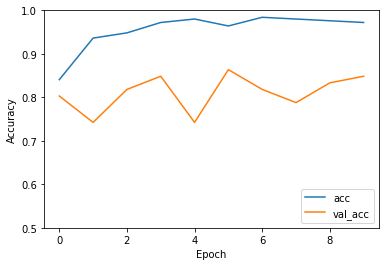

In [16]:
# Evaluate the model
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_accuracy = model.evaluate(test_images,  test_labels, verbose=2)
print('Test Accuracy: ', test_accuracy)

In [11]:
# Verify and plot predictions
def plot_image(id_, predictions_array, true_label, image):
    true_label, image = true_label[id_][0], image[id_]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

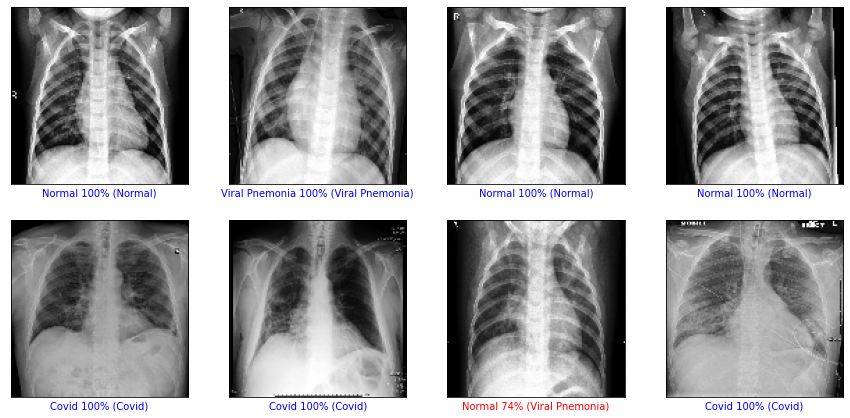

In [12]:
fig = plt.figure(figsize=(15, 15))
for _ in range(8):
    fig.add_subplot(4, 4, _+1)
    i = np.random.randint(0, 66)
    plot_image(i, predictions[i], test_labels, test_images)